In [2]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

import pickle

In [3]:
# Read CSV files into Data Frames:
weather = pd.read_csv('working_weatherHistory_asof_2022.03.26.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
station = pd.read_csv('working_stationState_asof_2022.03.26.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [4]:
weather.shape

(14443, 19)

In [5]:
station.shape

(1579820, 8)

In [6]:
weather.head()

,weatherTime,latitude,longitude,main,description,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,country,name
0,2022-02-22 12:53:29,53.3498,-6.2603,Clouds,few clouds,282.81,278.75,281.86,283.69,1015,71,NaN,NaN,10.80,270,NaN,20,IE,Mountjoy
1,2022-02-22 12:55:30,53.3498,-6.2603,Clouds,few clouds,282.81,278.75,281.86,283.69,1015,71,NaN,NaN,10.80,270,NaN,20,IE,Mountjoy
2,2022-02-24 10:56:43,53.3515,-6.2553,Clouds,scattered clouds,276.31,270.37,275.31,276.99,1007,80,NaN,NaN,9.77,240,NaN,40,IE,Mountjoy
3,2022-03-01 09:16:10,53.3498,-6.2603,Clear,clear sky,275.03,275.03,272.52,276.98,1030,91,NaN,NaN,1.03,0,NaN,0,IE,Mountjoy
4,2022-03-01 09:30:03,53.3498,-6.2603,Clear,clear sky,276.80,276.80,273.53,279.76,1030,88,NaN,NaN,1.03,0,NaN,0,IE,Mountjoy


In [7]:
station.head()

,ID,stationId,weatherTime,status,bike_stands,available_bike_stands,available_bikes,lastUpdate
0,2,1,2022-02-22 12:53:29,OPEN,30,12,18,1645534152000
1,3,2,2022-02-22 12:53:29,OPEN,20,18,2,1645534249000
2,4,3,2022-02-22 12:53:29,OPEN,33,20,13,1645534112000
3,5,4,2022-02-22 12:53:29,OPEN,35,22,13,1645534063000
4,6,5,2022-02-22 12:53:29,OPEN,40,38,2,1645533938000


In [8]:
stationWeather = pd.merge(station, weather, how="left", on=["weatherTime"])

In [9]:
stationWeather.head()

,ID,stationId,weatherTime,status,bike_stands,available_bike_stands,available_bikes,lastUpdate,latitude,longitude,...,pressure,humidity,sea_level,grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,country,name
0,2,1,2022-02-22 12:53:29,OPEN,30,12,18,1645534152000,53.3498,-6.2603,...,1015,71,NaN,NaN,10.8,270,NaN,20,IE,Mountjoy
1,3,2,2022-02-22 12:53:29,OPEN,20,18,2,1645534249000,53.3498,-6.2603,...,1015,71,NaN,NaN,10.8,270,NaN,20,IE,Mountjoy
2,4,3,2022-02-22 12:53:29,OPEN,33,20,13,1645534112000,53.3498,-6.2603,...,1015,71,NaN,NaN,10.8,270,NaN,20,IE,Mountjoy
3,5,4,2022-02-22 12:53:29,OPEN,35,22,13,1645534063000,53.3498,-6.2603,...,1015,71,NaN,NaN,10.8,270,NaN,20,IE,Mountjoy
4,6,5,2022-02-22 12:53:29,OPEN,40,38,2,1645533938000,53.3498,-6.2603,...,1015,71,NaN,NaN,10.8,270,NaN,20,IE,Mountjoy


In [10]:
stationWeather.tail()

,ID,stationId,weatherTime,status,bike_stands,available_bike_stands,available_bikes,lastUpdate,latitude,longitude,...,pressure,humidity,sea_level,grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,country,name
1579815,1579817,106,2022-03-26 14:16:02,OPEN,20,20,0,1648303888000,53.3498,-6.2603,...,1034,57,NaN,NaN,4.63,70,NaN,0,IE,Dublin
1579816,1579818,107,2022-03-26 14:16:02,OPEN,40,26,14,1648303696000,53.3498,-6.2603,...,1034,57,NaN,NaN,4.63,70,NaN,0,IE,Dublin
1579817,1579819,108,2022-03-26 14:16:02,OPEN,40,19,21,1648304114000,53.3498,-6.2603,...,1034,57,NaN,NaN,4.63,70,NaN,0,IE,Dublin
1579818,1579820,109,2022-03-26 14:16:02,OPEN,30,0,30,1648303984000,53.3498,-6.2603,...,1034,57,NaN,NaN,4.63,70,NaN,0,IE,Dublin
1579819,1579821,110,2022-03-26 14:16:02,OPEN,30,23,7,1648303774000,53.3498,-6.2603,...,1034,57,NaN,NaN,4.63,70,NaN,0,IE,Dublin


In [11]:
stationWeather.dtypes

ID                         int64
stationId                  int64
weatherTime               object
status                    object
bike_stands                int64
available_bike_stands      int64
available_bikes            int64
lastUpdate                 int64
latitude                 float64
longitude                float64
main                      object
description               object
temp                     float64
feels_like               float64
temp_min                 float64
temp_max                 float64
pressure                   int64
humidity                   int64
sea_level                float64
grnd_level               float64
wind_speed               float64
wind_deg                   int64
wind_gust                float64
clouds_all                 int64
country                   object
name                      object
dtype: object

In [12]:
# Checking correlations for all the contious features
stationWeather.corr()

,ID,stationId,bike_stands,available_bike_stands,available_bikes,lastUpdate,latitude,longitude,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level,wind_speed,wind_deg,wind_gust,clouds_all
ID,1.000000,6.962531e-05,-5.733909e-06,-0.007876,-0.007164,0.999885,-5.219850e-02,-6.669467e-02,5.787783e-01,6.416315e-01,5.107304e-01,6.217527e-01,3.609610e-01,-2.465816e-01,NaN,NaN,-2.281555e-01,-1.976061e-01,-2.247464e-01,-2.856430e-01
stationId,0.000070,1.000000e+00,-8.235380e-02,-0.012317,-0.040503,-0.000004,4.756277e-14,-1.573345e-15,-2.948827e-14,-3.429772e-14,-2.511134e-14,-3.306301e-14,-2.949105e-14,1.675290e-14,NaN,NaN,1.692705e-14,1.000546e-14,5.977285e-15,2.217877e-14
bike_stands,-0.000006,-8.235380e-02,1.000000e+00,0.546971,0.192535,0.000003,-5.844746e-15,1.084427e-15,1.165076e-15,-8.706614e-16,1.861637e-15,4.621140e-16,-1.675242e-14,-1.576464e-17,NaN,NaN,1.066009e-14,6.659596e-15,-8.880239e-15,3.658268e-15
available_bike_stands,-0.007876,-1.231685e-02,5.469710e-01,1.000000,-0.671588,-0.007862,-2.447613e-03,-1.601674e-03,1.836374e-02,1.576218e-02,1.727147e-02,2.036356e-02,-5.737444e-03,-1.200775e-02,NaN,NaN,1.521675e-03,-1.157648e-02,-1.080894e-03,2.167116e-03
available_bikes,-0.007164,-4.050273e-02,1.925351e-01,-0.671588,1.000000,-0.007200,4.607384e-04,7.861884e-04,-2.494123e-02,-2.412586e-02,-2.416974e-02,-2.496945e-02,-1.310691e-02,2.577782e-02,NaN,NaN,-2.658852e-03,1.700013e-03,7.430698e-03,2.680608e-03
lastUpdate,0.999885,-4.131345e-06,3.368798e-06,-0.007862,-0.007200,1.000000,-5.217601e-02,-6.659996e-02,5.786581e-01,6.414084e-01,5.102770e-01,6.218825e-01,3.629190e-01,-2.461845e-01,NaN,NaN,-2.276228e-01,-1.988107e-01,-2.251230e-01,-2.866757e-01
latitude,-0.052198,4.756277e-14,-5.844746e-15,-0.002448,0.000461,-0.052176,1.000000e+00,5.630411e-01,-4.246294e-02,-4.614369e-02,-2.645525e-02,-5.306859e-02,-3.616734e-02,6.718590e-03,NaN,NaN,4.056297e-02,1.821222e-02,9.552176e-03,5.506622e-02
longitude,-0.066695,-1.573345e-15,1.084427e-15,-0.001602,0.000786,-0.066600,5.630411e-01,1.000000e+00,-4.560366e-02,-5.586599e-02,-2.885004e-02,-5.302979e-02,-4.261718e-02,2.218992e-02,NaN,NaN,6.706614e-02,2.985883e-03,7.657471e-02,5.874112e-02
temp,0.578778,-2.948827e-14,1.165076e-15,0.018364,-0.024941,0.578658,-4.246294e-02,-4.560366e-02,1.000000e+00,9.630745e-01,9.687820e-01,9.684643e-01,1.030317e-01,-5.652473e-01,NaN,NaN,1.484113e-01,-1.834336e-01,8.721784e-02,-3.759393e-02
feels_like,0.641632,-3.429772e-14,-8.706614e-16,0.015762,-0.024126,0.641408,-4.614369e-02,-5.586599e-02,9.630745e-01,1.000000e+00,9.053898e-01,9.574601e-01,2.141231e-01,-5.385302e-01,NaN,NaN,-6.370460e-02,-1.876907e-01,-2.633662e-01,-1.171979e-01


In [22]:
stationWeather[['weatherDate', 'weatherHour']] = stationWeather['weatherTime'].str.split(' ', expand=True)
stationWeather

,ID,stationId,weatherTime,status,bike_stands,available_bike_stands,available_bikes,lastUpdate,latitude,longitude,...,sea_level,grnd_level,wind_speed,wind_deg,wind_gust,clouds_all,country,name,weatherDate,weatherHour
0,2,1,2022-02-22 12:53:29,OPEN,30,12,18,1645534152000,53.3498,-6.2603,...,NaN,NaN,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12:53:29
1,3,2,2022-02-22 12:53:29,OPEN,20,18,2,1645534249000,53.3498,-6.2603,...,NaN,NaN,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12:53:29
2,4,3,2022-02-22 12:53:29,OPEN,33,20,13,1645534112000,53.3498,-6.2603,...,NaN,NaN,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12:53:29
3,5,4,2022-02-22 12:53:29,OPEN,35,22,13,1645534063000,53.3498,-6.2603,...,NaN,NaN,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12:53:29
4,6,5,2022-02-22 12:53:29,OPEN,40,38,2,1645533938000,53.3498,-6.2603,...,NaN,NaN,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12:53:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579815,1579817,106,2022-03-26 14:16:02,OPEN,20,20,0,1648303888000,53.3498,-6.2603,...,NaN,NaN,4.63,70,NaN,0,IE,Dublin,2022-03-26,14:16:02
1579816,1579818,107,2022-03-26 14:16:02,OPEN,40,26,14,1648303696000,53.3498,-6.2603,...,NaN,NaN,4.63,70,NaN,0,IE,Dublin,2022-03-26,14:16:02
1579817,1579819,108,2022-03-26 14:16:02,OPEN,40,19,21,1648304114000,53.3498,-6.2603,...,NaN,NaN,4.63,70,NaN,0,IE,Dublin,2022-03-26,14:16:02
1579818,1579820,109,2022-03-26 14:16:02,OPEN,30,0,30,1648303984000,53.3498,-6.2603,...,NaN,NaN,4.63,70,NaN,0,IE,Dublin,2022-03-26,14:16:02


In [23]:
stationWeather[['weatherHour', 'weatherMinute', 'weatherSecond']] = stationWeather['weatherHour'].str.split(':', expand=True)
stationWeather

,ID,stationId,weatherTime,status,bike_stands,available_bike_stands,available_bikes,lastUpdate,latitude,longitude,...,wind_speed,wind_deg,wind_gust,clouds_all,country,name,weatherDate,weatherHour,weatherMinute,weatherSecond
0,2,1,2022-02-22 12:53:29,OPEN,30,12,18,1645534152000,53.3498,-6.2603,...,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12,53,29
1,3,2,2022-02-22 12:53:29,OPEN,20,18,2,1645534249000,53.3498,-6.2603,...,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12,53,29
2,4,3,2022-02-22 12:53:29,OPEN,33,20,13,1645534112000,53.3498,-6.2603,...,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12,53,29
3,5,4,2022-02-22 12:53:29,OPEN,35,22,13,1645534063000,53.3498,-6.2603,...,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12,53,29
4,6,5,2022-02-22 12:53:29,OPEN,40,38,2,1645533938000,53.3498,-6.2603,...,10.80,270,NaN,20,IE,Mountjoy,2022-02-22,12,53,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579815,1579817,106,2022-03-26 14:16:02,OPEN,20,20,0,1648303888000,53.3498,-6.2603,...,4.63,70,NaN,0,IE,Dublin,2022-03-26,14,16,02
1579816,1579818,107,2022-03-26 14:16:02,OPEN,40,26,14,1648303696000,53.3498,-6.2603,...,4.63,70,NaN,0,IE,Dublin,2022-03-26,14,16,02
1579817,1579819,108,2022-03-26 14:16:02,OPEN,40,19,21,1648304114000,53.3498,-6.2603,...,4.63,70,NaN,0,IE,Dublin,2022-03-26,14,16,02
1579818,1579820,109,2022-03-26 14:16:02,OPEN,30,0,30,1648303984000,53.3498,-6.2603,...,4.63,70,NaN,0,IE,Dublin,2022-03-26,14,16,02


In [24]:
stationWeather[['weatherYear', 'weatherMonth', 'weatherDay']] = stationWeather['weatherDate'].str.split('-', expand=True)
stationWeather

,ID,stationId,weatherTime,status,bike_stands,available_bike_stands,available_bikes,lastUpdate,latitude,longitude,...,clouds_all,country,name,weatherDate,weatherHour,weatherMinute,weatherSecond,weatherYear,weatherMonth,weatherDay
0,2,1,2022-02-22 12:53:29,OPEN,30,12,18,1645534152000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-02-22,12,53,29,2022,02,22
1,3,2,2022-02-22 12:53:29,OPEN,20,18,2,1645534249000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-02-22,12,53,29,2022,02,22
2,4,3,2022-02-22 12:53:29,OPEN,33,20,13,1645534112000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-02-22,12,53,29,2022,02,22
3,5,4,2022-02-22 12:53:29,OPEN,35,22,13,1645534063000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-02-22,12,53,29,2022,02,22
4,6,5,2022-02-22 12:53:29,OPEN,40,38,2,1645533938000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-02-22,12,53,29,2022,02,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579815,1579817,106,2022-03-26 14:16:02,OPEN,20,20,0,1648303888000,53.3498,-6.2603,...,0,IE,Dublin,2022-03-26,14,16,02,2022,03,26
1579816,1579818,107,2022-03-26 14:16:02,OPEN,40,26,14,1648303696000,53.3498,-6.2603,...,0,IE,Dublin,2022-03-26,14,16,02,2022,03,26
1579817,1579819,108,2022-03-26 14:16:02,OPEN,40,19,21,1648304114000,53.3498,-6.2603,...,0,IE,Dublin,2022-03-26,14,16,02,2022,03,26
1579818,1579820,109,2022-03-26 14:16:02,OPEN,30,0,30,1648303984000,53.3498,-6.2603,...,0,IE,Dublin,2022-03-26,14,16,02,2022,03,26


In [25]:
station1Weather = stationWeather.query('stationId == 1')
station1Weather

,ID,stationId,weatherTime,status,bike_stands,available_bike_stands,available_bikes,lastUpdate,latitude,longitude,...,clouds_all,country,name,weatherDate,weatherHour,weatherMinute,weatherSecond,weatherYear,weatherMonth,weatherDay
0,2,1,2022-02-22 12:53:29,OPEN,30,12,18,1645534152000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-02-22,12,53,29,2022,02,22
110,112,1,2022-02-22 12:55:30,OPEN,30,13,17,1645534476000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-02-22,12,55,30,2022,02,22
220,222,1,2022-02-24 10:56:43,OPEN,30,17,13,1645700065000,53.3515,-6.2553,...,40,IE,Mountjoy,2022-02-24,10,56,43,2022,02,24
330,332,1,2022-03-01 09:16:10,OPEN,30,5,25,1646126046000,53.3498,-6.2603,...,0,IE,Mountjoy,2022-03-01,09,16,10,2022,03,01
440,442,1,2022-03-01 09:30:03,OPEN,30,6,24,1646126951000,53.3498,-6.2603,...,0,IE,Mountjoy,2022-03-01,09,30,03,2022,03,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579270,1579272,1,2022-03-26 14:08:01,OPEN,30,13,17,1648303329000,53.3498,-6.2603,...,20,IE,Dublin,2022-03-26,14,08,01,2022,03,26
1579380,1579382,1,2022-03-26 14:10:01,OPEN,30,13,17,1648303329000,53.3498,-6.2603,...,20,IE,Dublin,2022-03-26,14,10,01,2022,03,26
1579490,1579492,1,2022-03-26 14:12:02,OPEN,30,13,17,1648303329000,53.3498,-6.2603,...,20,IE,Mountjoy,2022-03-26,14,12,02,2022,03,26
1579600,1579602,1,2022-03-26 14:14:02,OPEN,30,13,17,1648303935000,53.3498,-6.2603,...,20,IE,Dublin,2022-03-26,14,14,02,2022,03,26


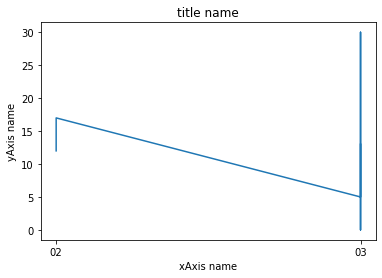

In [28]:
x = station1Weather['available_bike_stands']
y = station1Weather['weatherMonth']

plt.plot(y, x)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()